# a)Load the dataset and explore its structure

Shape of the data: (1797, 64)
Shape of the target: (1797,)


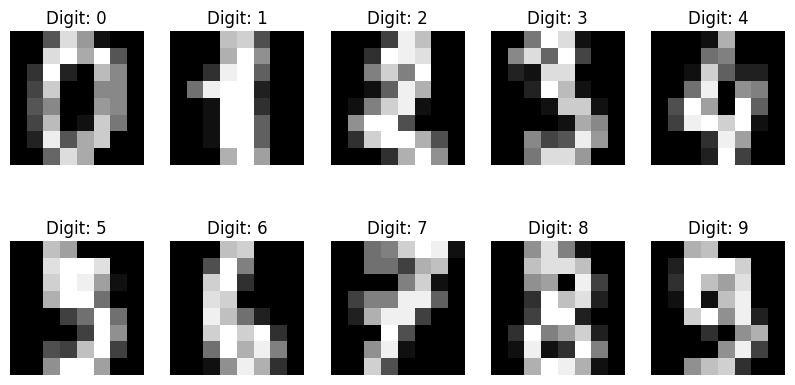

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

# Load the dataset
digits = load_digits()
X = digits.data
y = digits.target

# Explore the structure of the dataset
print("Shape of the data:", X.shape)
print("Shape of the target:", y.shape)

# Plot at least one image for each digit
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(digits.images[i], cmap='gray')
    ax.set_title(f"Digit: {digits.target[i]}")
    ax.axis('off')
plt.show()


# b) Pre-process the dataset


In [3]:
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

# c) Use KMeans algorithm to create clusters


KMeans clustering results:


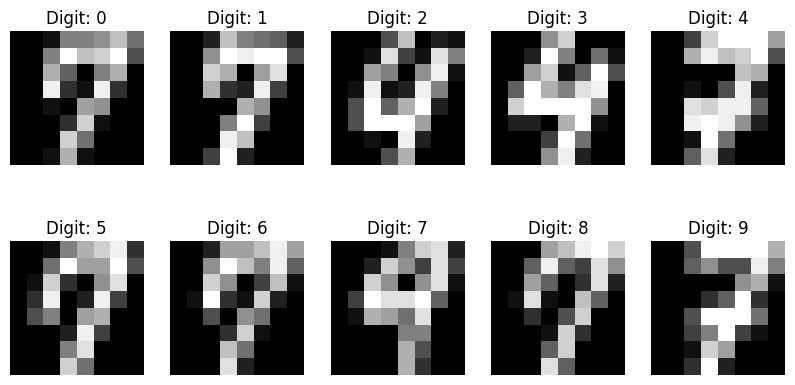

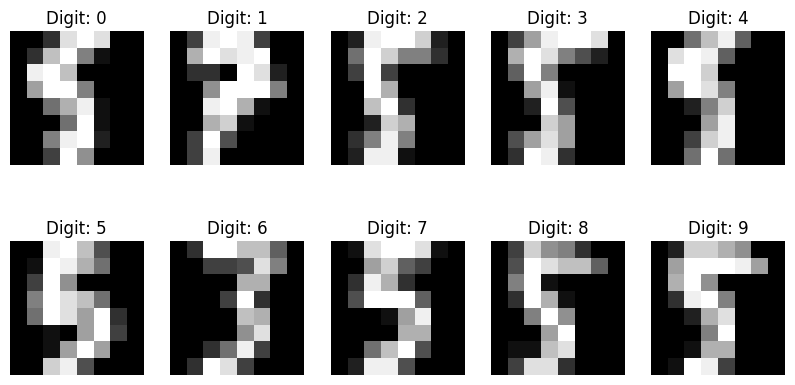

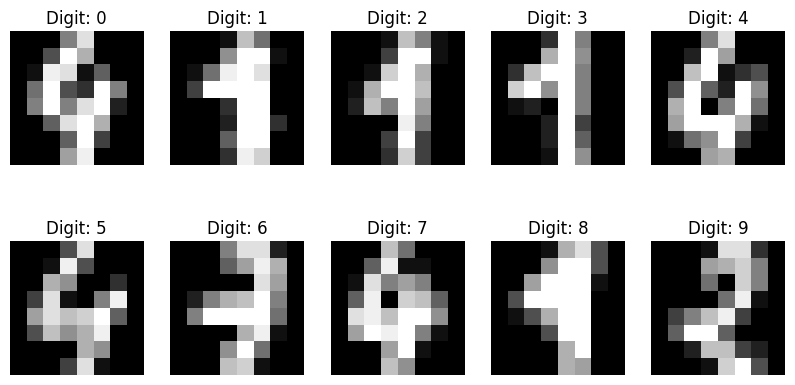

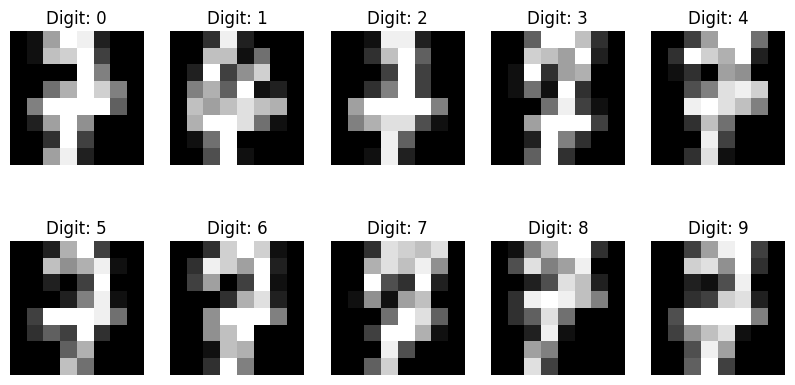

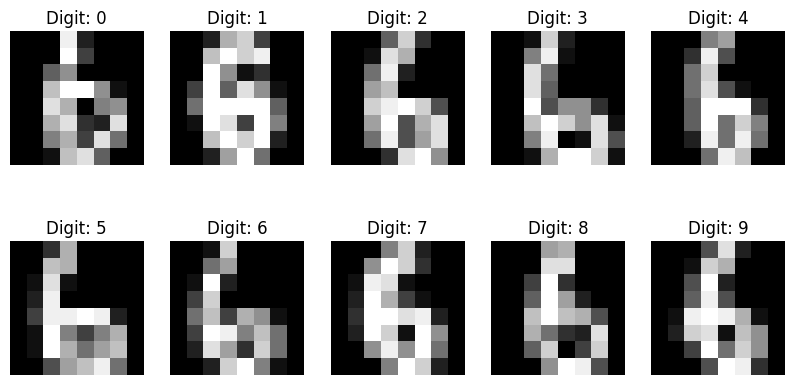

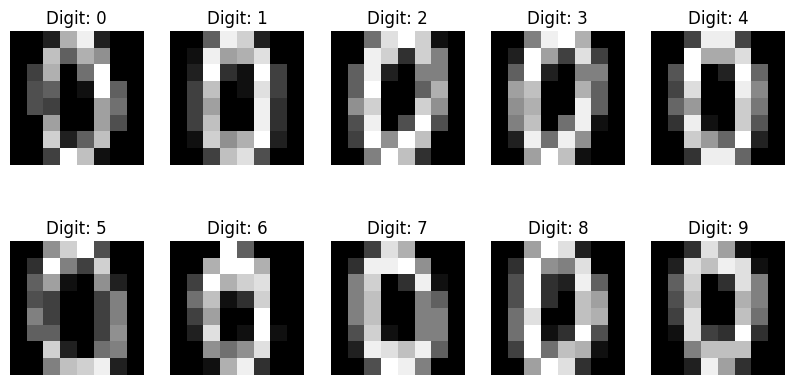

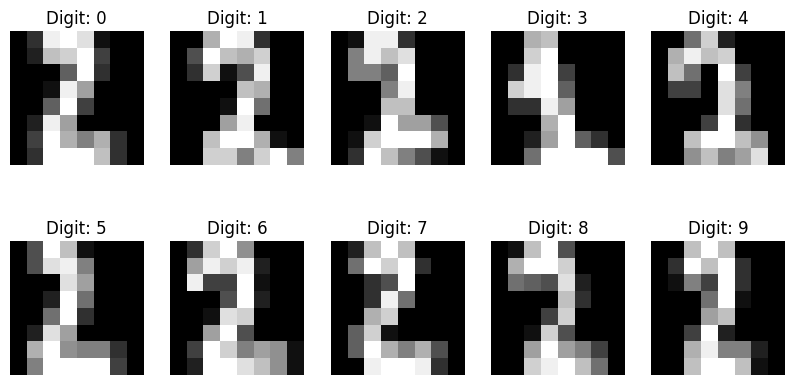

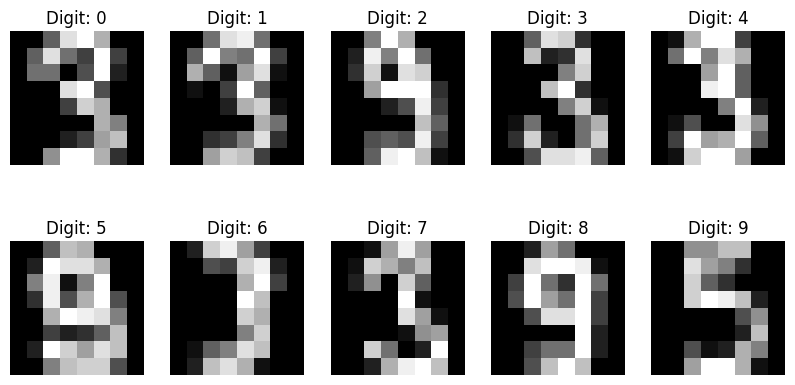

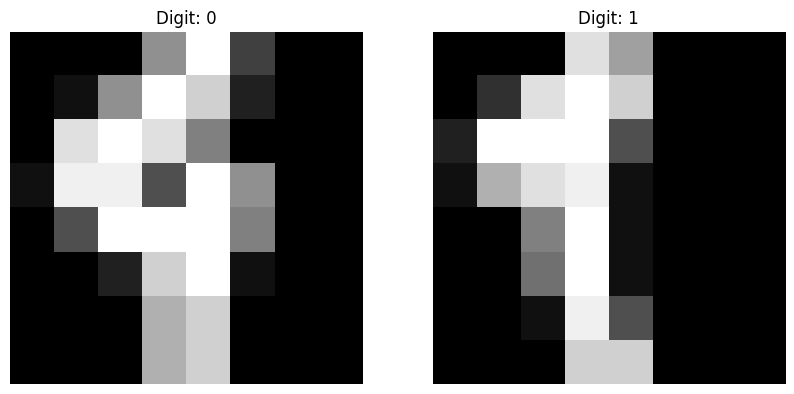

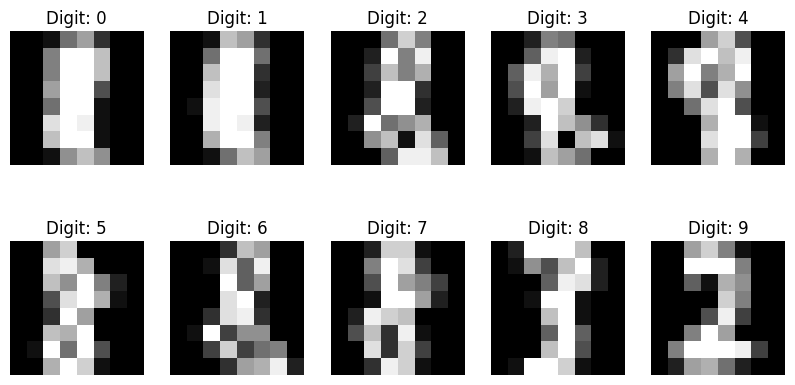

In [4]:
from sklearn.cluster import KMeans

# Create and fit the KMeans model
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(X_scaled)

# Predict the clusters
kmeans_labels = kmeans.labels_

# Evaluate the clustering
print("KMeans clustering results:")
for i in range(10):
    results=np.where(kmeans_labels == i)[0]
    if(len(results)>=10):
        results=np.random.choice(results,10,replace=False)
        fig, axes = plt.subplots(2, 5, figsize=(10, 5))
        for i, ax in enumerate(axes.flatten()):
            ax.imshow(digits.images[results[i]], cmap='gray')
            ax.set_title(f"Digit: {i}")
            ax.axis('off')
        plt.show()
    else:
        fig, axes = plt.subplots(1, len(results), figsize=(10, 5))
        for i, ax in enumerate(axes.flatten()):
            ax.imshow(digits.images[results[i]], cmap='gray')
            ax.set_title(f"Digit: {i}")
            ax.axis('off')
        plt.show()  


# d) Use Hierarchical clustering algorithm to detect the clusters

Agglomerative clustering results:


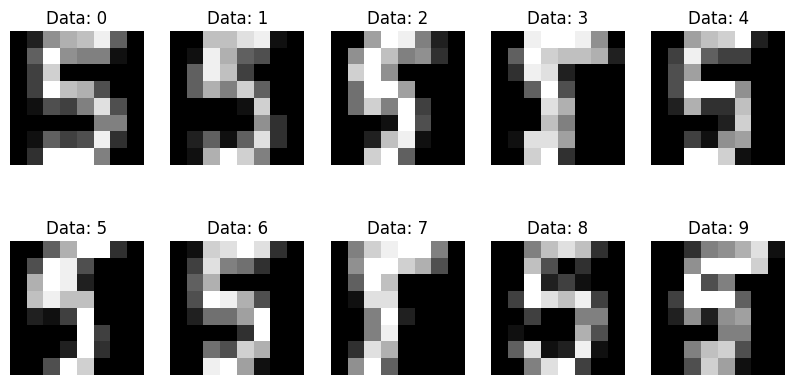

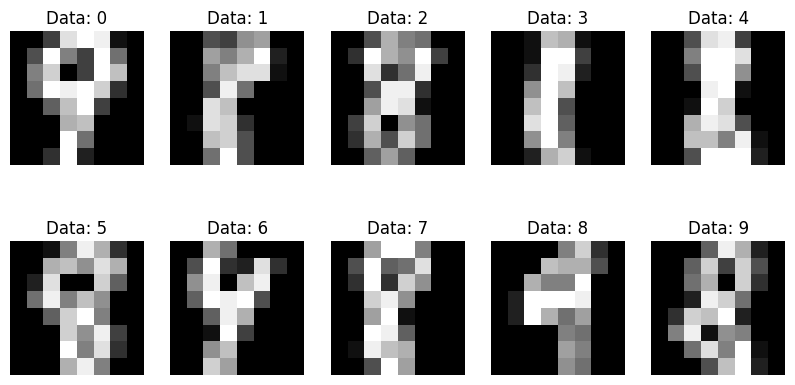

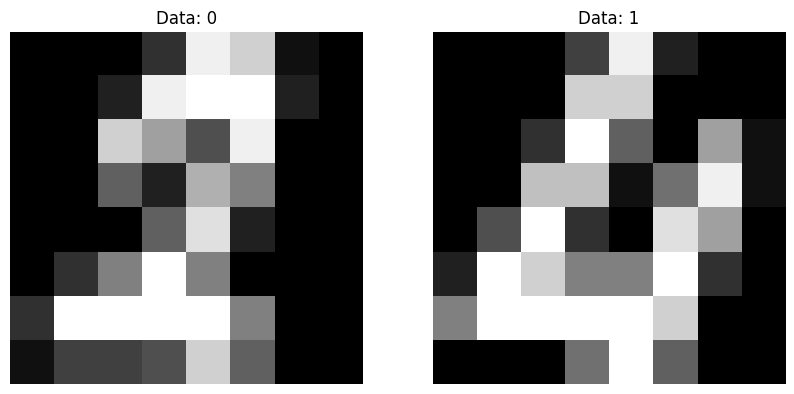

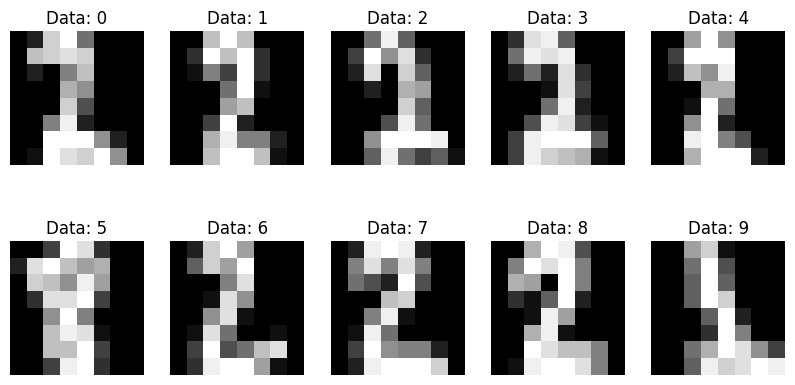

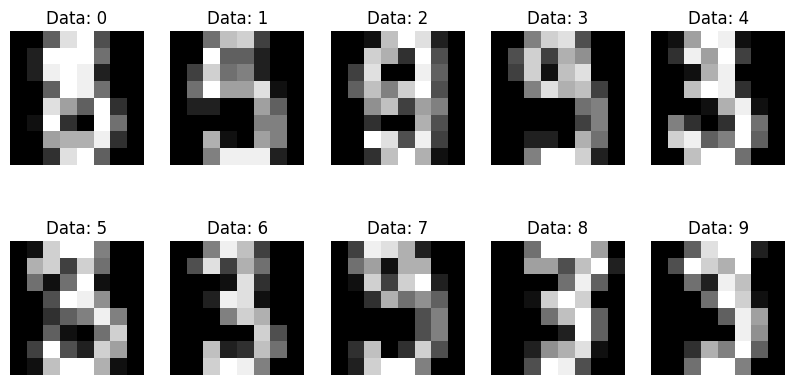

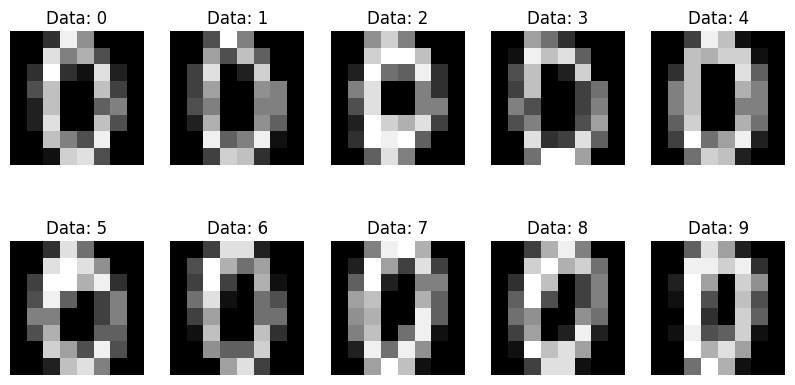

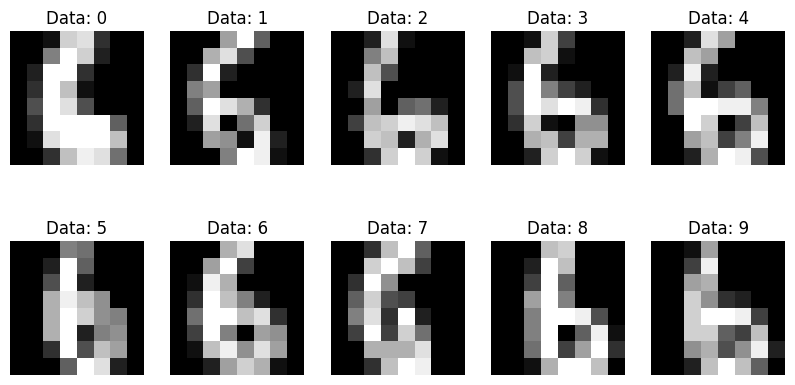

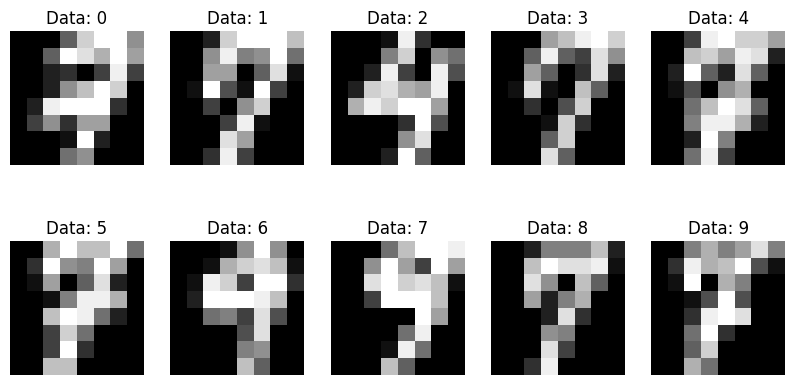

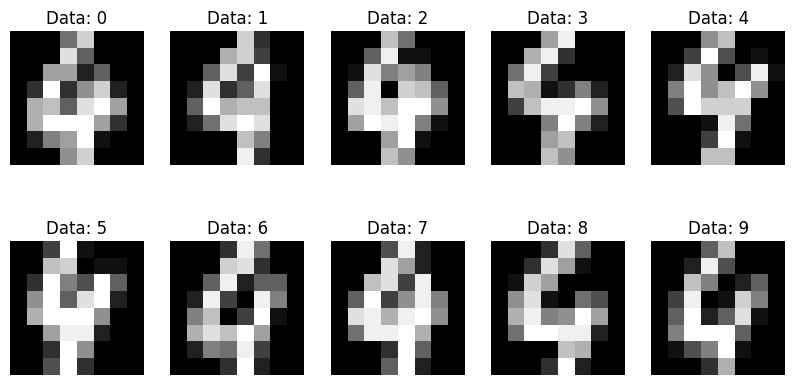

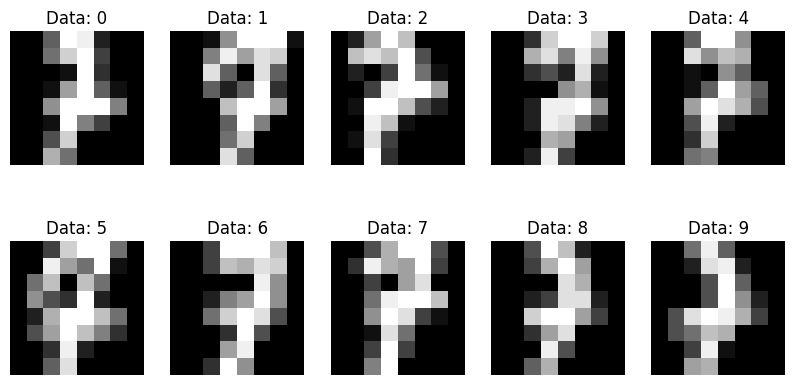

In [5]:
from sklearn.cluster import AgglomerativeClustering

# Create and fit the Agglomerative Clustering model
agg_clustering = AgglomerativeClustering(n_clusters=10)
agg_labels = agg_clustering.fit_predict(X_scaled)

# Evaluate the clustering
print("Agglomerative clustering results:")
for i in range(10):
    results=np.where(agg_labels == i)[0]
    if(len(results)>=10):
        results=np.random.choice(results,10,replace=False)
        fig, axes = plt.subplots(2, 5, figsize=(10, 5))
        for i, ax in enumerate(axes.flatten()):
            ax.imshow(digits.images[results[i]], cmap='gray')
            ax.set_title(f"Data: {i}")
            ax.axis('off')
        plt.show()
    else:
        fig, axes = plt.subplots(1, len(results), figsize=(10, 5))
        for i, ax in enumerate(axes.flatten()):
            ax.imshow(digits.images[results[i]], cmap='gray')
            ax.set_title(f"Data: {i}")
            ax.axis('off')
        plt.show()  


# e) Evaluate the quality of the models


In [6]:
from sklearn.metrics import silhouette_score

# Evaluate KMeans
kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)
print(f"KMeans Silhouette Score: {kmeans_silhouette}")

# Evaluate Agglomerative Clustering
agg_silhouette = silhouette_score(X_scaled, agg_labels)
print(f"Agglomerative Clustering Silhouette Score: {agg_silhouette}")


KMeans Silhouette Score: 0.13558208876901615
Agglomerative Clustering Silhouette Score: 0.12532527779196986


In [92]:
a=digits.images[0]
print(type(a[0,0]))
blank_image = np.ones((8,8)).astype(float)*255
print(type(blank_image[0,0]))


<class 'numpy.float64'>
<class 'numpy.float64'>


# f) Assign a label to each cluster


KMeans cluster to digit mapping: {0: 7, 1: 5, 2: 4, 3: 7, 4: 6, 5: 0, 6: 2, 7: 3, 8: 1, 9: 8}
Agglomerative cluster to digit mapping: {0: 5, 1: 8, 2: 2, 3: 2, 4: 3, 5: 0, 6: 6, 7: 7, 8: 4, 9: 7}


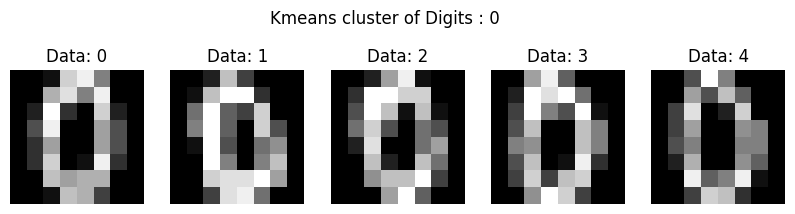

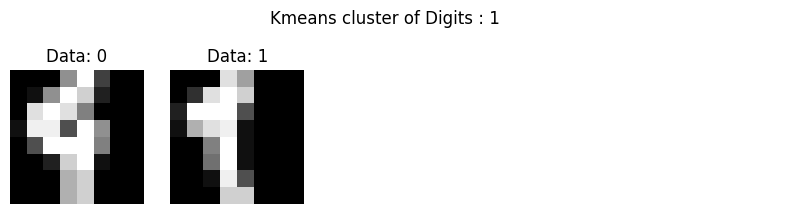

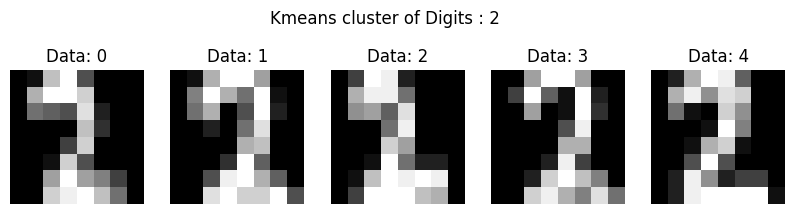

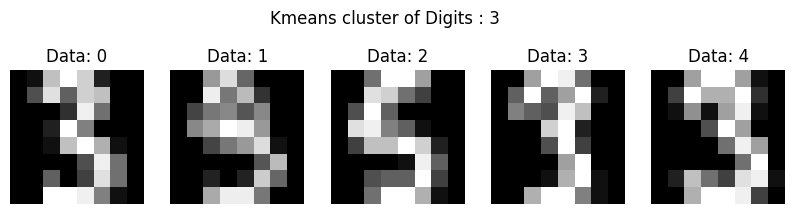

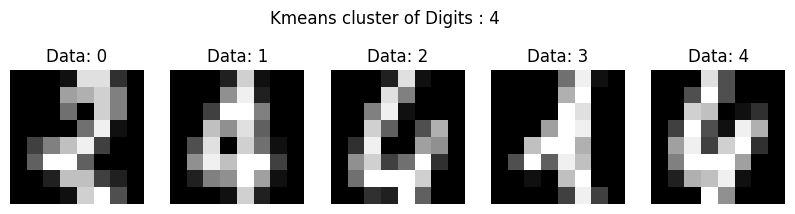

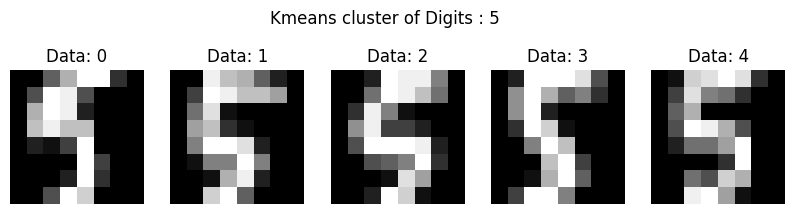

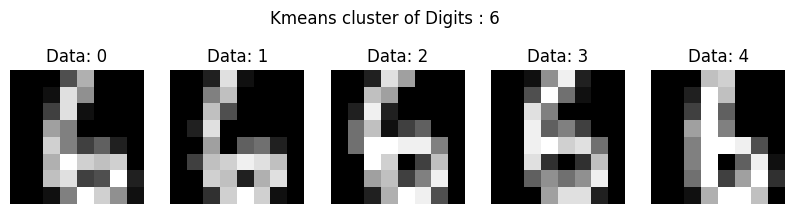

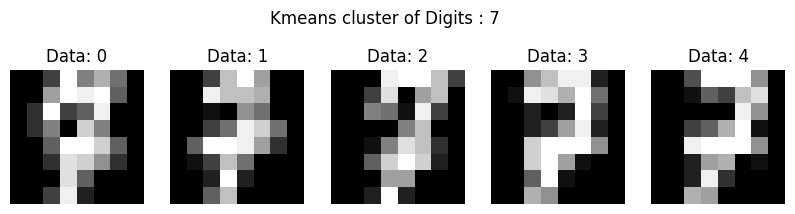

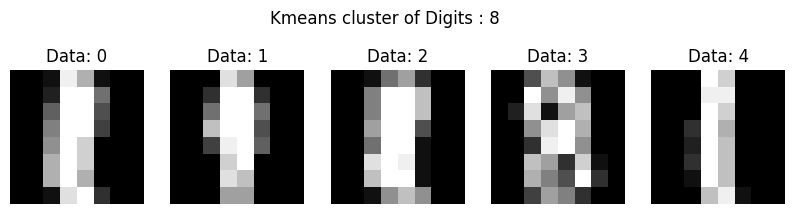

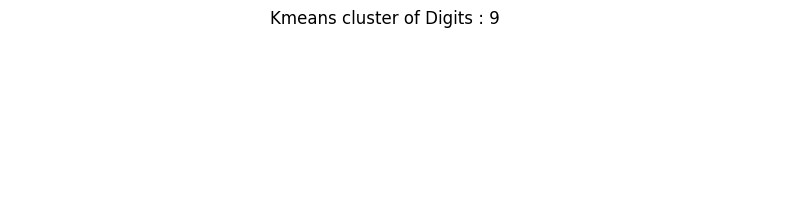

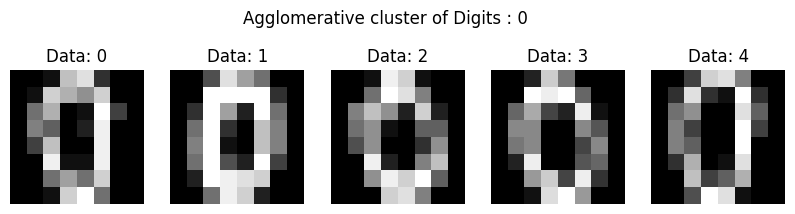

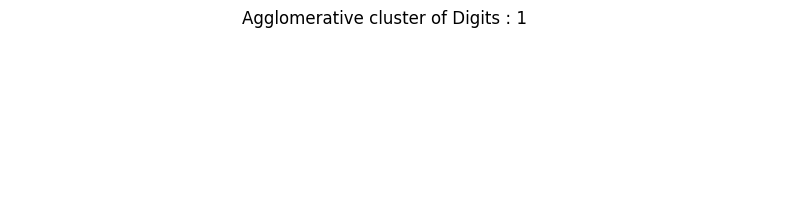

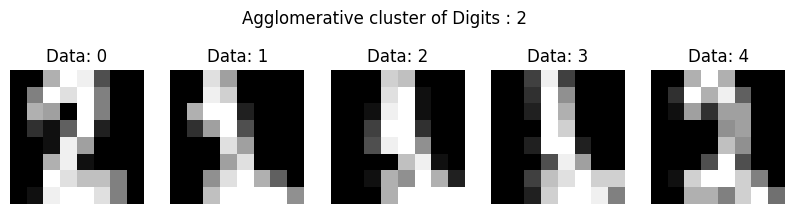

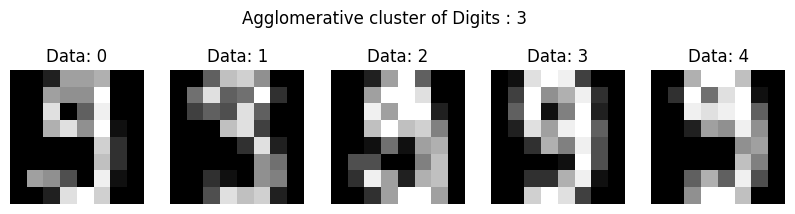

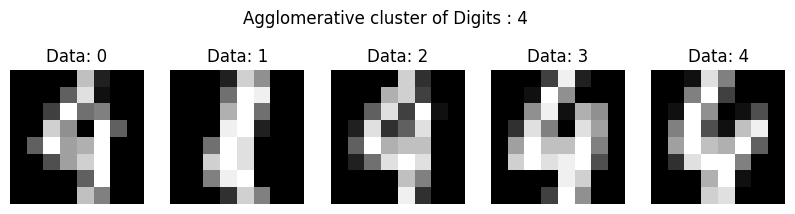

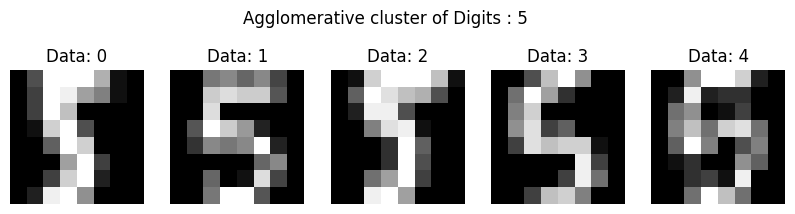

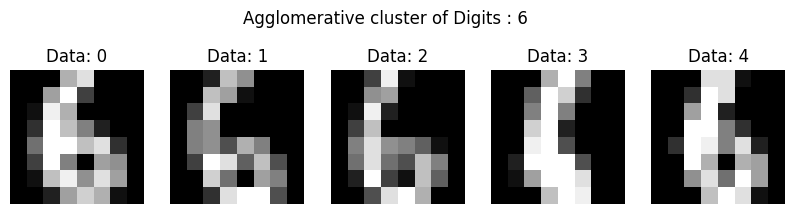

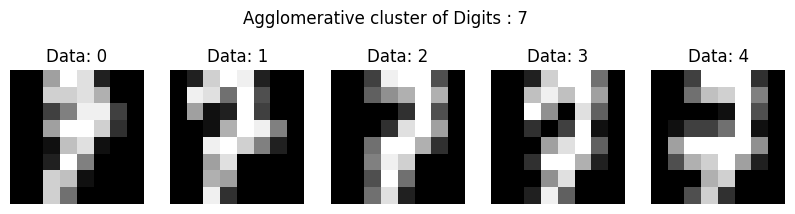

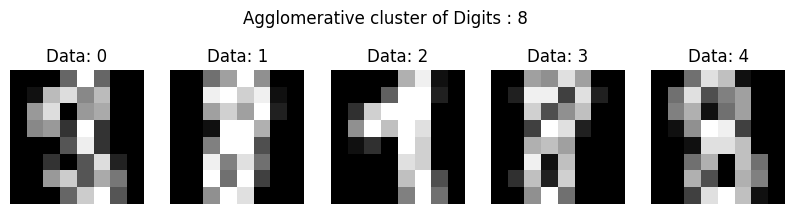

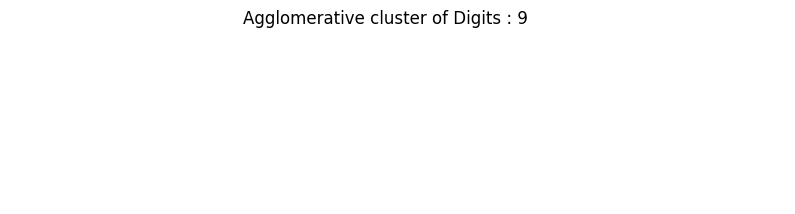

In [6]:
from scipy.stats import mode
import time

def assign_cluster_labels(cluster_labels, true_labels, n_clusters=10):
    cluster_to_digit = {}
    for i in range(n_clusters):
        labels_in_cluster = true_labels[cluster_labels == i]
        most_common = mode(labels_in_cluster,keepdims=True).mode[0]
        cluster_to_digit[i] = most_common
    return cluster_to_digit

# Assign labels to KMeans clusters
kmeans_cluster_to_digit = assign_cluster_labels(kmeans_labels, y)
print("KMeans cluster to digit mapping:", kmeans_cluster_to_digit)

# Assign labels to Agglomerative clusters
agg_cluster_to_digit = assign_cluster_labels(agg_labels, y)
print("Agglomerative cluster to digit mapping:", agg_cluster_to_digit)

# Map the cluster labels to digit labels
kmeans_digit_labels = np.array([kmeans_cluster_to_digit[label] for label in kmeans_labels])
agg_digit_labels = np.array([agg_cluster_to_digit[label] for label in agg_labels])

blank_image = np.ones((8,8))*255
for j in range(10):
    results=np.where(kmeans_digit_labels == j)[0]
    try:
        results=np.random.choice(results,5,replace=False)
    except:
        pass
    fig, axes = plt.subplots(1, 5, figsize=(10, 5))
    fig.suptitle(f"Kmeans cluster of Digits : {j}",y=0.75)
    for i in range(5):
        try:
            axes[i].imshow(digits.images[results[i]], cmap='gray')
            axes[i].set_title(f"Data: {i}")
            axes[i].axis('off')
        except:
            axes[i].imshow(blank_image,cmap='gray',vmin=0,vmax=255)
            axes[i].axis('off')
    plt.savefig(f"./Pictures/kmeans_cluster_Digits_{j}.jpg",bbox_inches='tight',pad_inches=0.2)
    time.sleep(0.5)
    #plt.show()    
for j in range(10):
    results=np.where(agg_digit_labels == j)[0]
    try:
        results=np.random.choice(results,5,replace=False)
    except:
        pass
    fig, axes = plt.subplots(1, 5, figsize=(10, 5))
    fig.suptitle(f"Agglomerative cluster of Digits : {j}",y=0.75)
    for i in range(5):
        try:
            axes[i].imshow(digits.images[results[i]], cmap='gray')
            axes[i].set_title(f"Data: {i}")
            axes[i].axis('off')
        except:
            axes[i].imshow(blank_image,cmap='gray',vmin=0,vmax=255)
            axes[i].axis('off')
    plt.savefig(f"./Pictures/Agg_cluster_Digits_{j}.jpg",bbox_inches='tight',pad_inches=0.2)
    time.sleep(0.5)
    #plt.show()    

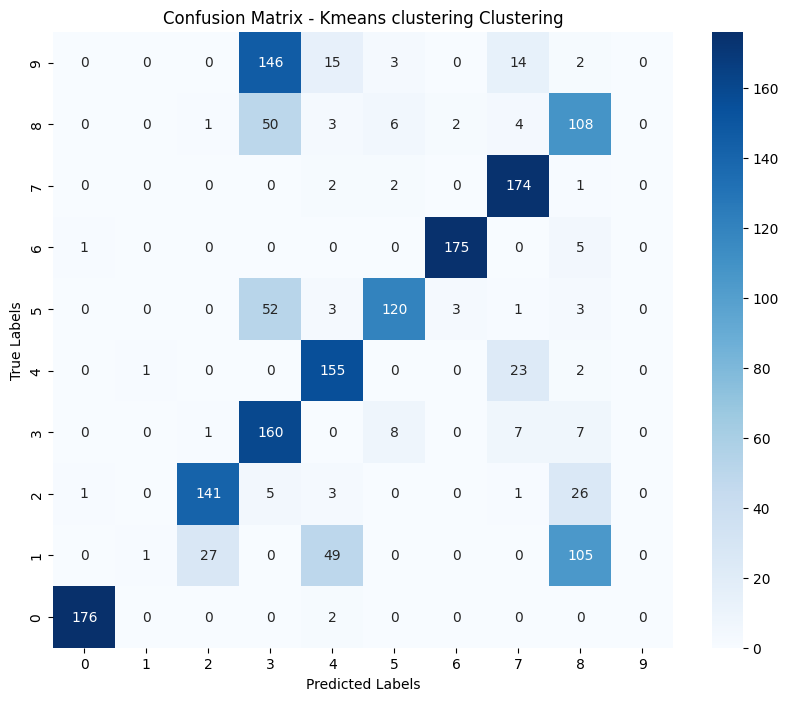

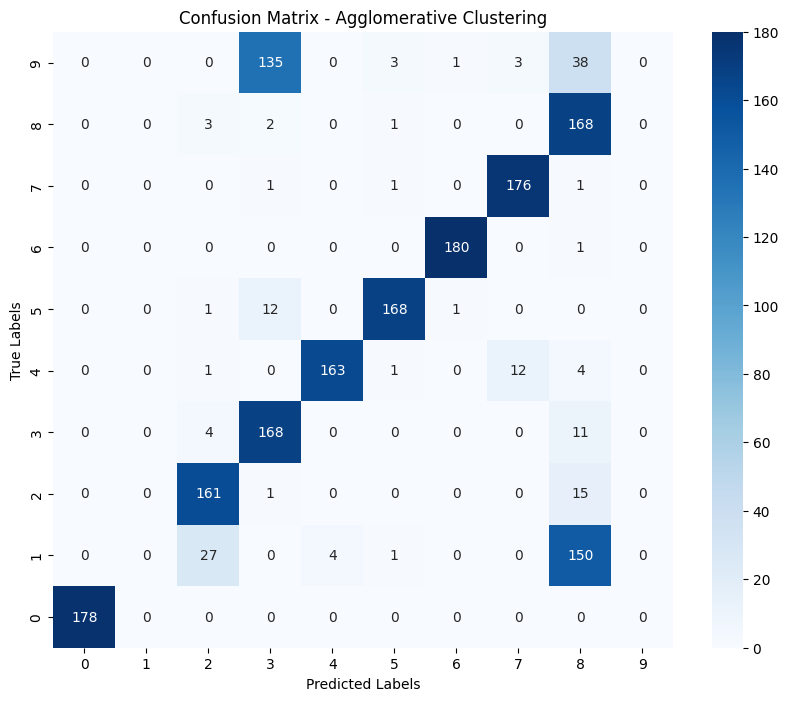

In [113]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate confusion matrix for KMeans
kmeans_conf_matrix = confusion_matrix(y, kmeans_digit_labels)
kmeans_conf_matrix=kmeans_conf_matrix[::-1]

# Calculate confusion matrix for Agglomerative Clustering
agg_conf_matrix = confusion_matrix(y, agg_digit_labels)
agg_conf_matrix=agg_conf_matrix[::-1]


# Plot confusion matrix for KMeans
plt.figure(figsize=(10, 8))
sns.heatmap(kmeans_conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=np.unique(y), yticklabels=np.unique(y)[::-1])
plt.title('Confusion Matrix - Kmeans clustering Clustering')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.show()

# Plot confusion matrix for Agglomerative Clustering
plt.figure(figsize=(10, 8))
sns.heatmap(agg_conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=np.unique(y), yticklabels=np.unique(y) [::-1])
plt.title('Confusion Matrix - Agglomerative Clustering')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()